# Google Colab Demo with CatCat Dataset

In this notebook, we will:
- Upload the CatCat dataset (downloaded from Kaggle) from local storage.
- Unzip and inspect the dataset.
- Create a data pipeline using `tf.keras.preprocessing.image_dataset_from_directory`.
- Build a simple Convolutional Neural Network (CNN) for image classification.
- Save the model checkpoint and download it to local storage.

> **Note:** Before running the notebook, download the CatCat dataset from [Kaggle](https://www.kaggle.com/datasets/mahmudulhaqueshawon/catcat), and compress the folder (if needed) into `catcat.zip`.


In [ ]:
%pip install tensorflow opencv-python numpy matplotlib pandas

In [ ]:
import tensorflow as tf

print("TensorFlow version:", tf.__version__)
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    print("GPU is available!")
else:
    print("Running on CPU.")

TensorFlow version: 2.18.0
GPU is available!


In [ ]:
from google.colab import files

# Open a dialog to upload the catcat.zip file.
uploaded = files.upload()  # Select the catcat.zip file when prompted

# List uploaded file names for confirmation
for filename in uploaded.keys():
    print('Uploaded file:', filename)

In [ ]:
!unzip -q catcat.zip -d catcat
print("Dataset extracted to the 'catcat' folder.")

Dataset extracted to the 'catcat' folder.


In [ ]:
!unzip -q catcat.zip -d drive/MyDrive/datasets/catcat

In [ ]:
!ls catcat

test  train


In [ ]:
import os
import tensorflow as tf

# Define the path to your dataset directory.
dataset_path_train = "drive/MyDrive/datasets/catcat/train"  # Adjust if your folder structure is different
dataset_path_test = "drive/MyDrive/datasets/catcat/test"  # Adjust if your folder structure is different
# Set image size and batch size for training.
img_height, img_width = 128, 128
batch_size = 32

# Load the dataset; using a validation split for demonstration.
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path_train,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    dataset_path_test,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size)

# Get class names
class_names = train_ds.class_names
print("Class names:", class_names)

Found 555 files belonging to 2 classes.
Using 444 files for training.
Found 138 files belonging to 2 classes.
Using 27 files for validation.
Class names: ['cats', 'dogs']


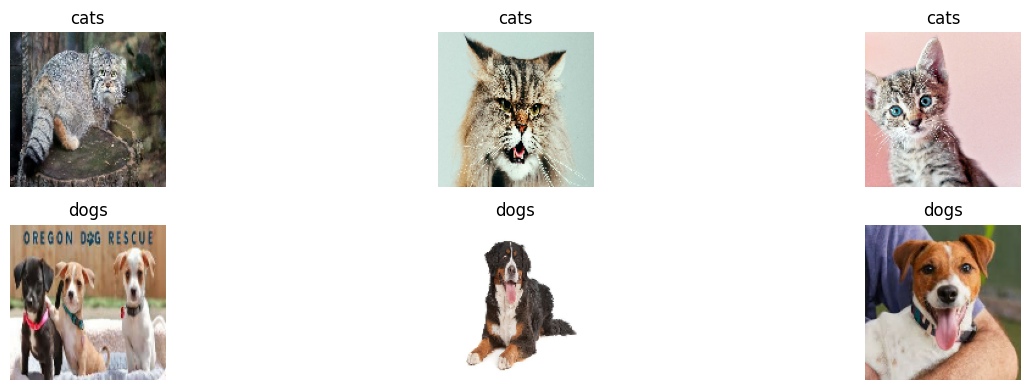

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def display_images_from_dataset(dataset, class_names, images_per_class=3):
    """
    Displays a specified number of images per class from the dataset.

    Parameters:
    - dataset: A tf.data.Dataset object containing image-label pairs.
    - class_names: A list of class names corresponding to label indices.
    - images_per_class: Number of images to display per class.
    """
    # Initialize a dictionary to keep track of images displayed per class
    images_displayed = {class_name: 0 for class_name in class_names}

    plt.figure(figsize=(15, len(class_names) * 2))

    for images, labels in dataset.unbatch():
        label = labels.numpy()
        class_name = class_names[label]

        # Check if we've already displayed the desired number of images for this class
        if images_displayed[class_name] < images_per_class:
            images_displayed[class_name] += 1

            ax = plt.subplot(len(class_names), images_per_class,
                             images_per_class * label + images_displayed[class_name])
            plt.imshow(images.numpy().astype("uint8"))
            plt.title(class_name)
            plt.axis("off")

        # Break the loop if we've displayed enough images for all classes
        if all(count >= images_per_class for count in images_displayed.values()):
            break

    plt.tight_layout()
    plt.show()

# Display 3 images per class from the training dataset
display_images_from_dataset(train_ds, class_names, images_per_class=3)

In [ ]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
    layers.Conv2D(32, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(128, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(len(class_names), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling_4 (Rescaling)              │ (None, 128, 128, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,304,898 (12.61 MB)

 Trainable params: 3,304,898 (12.61 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoint_path = "model_checkpoint.h5"
checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                save_best_only=True,
                                                monitor='val_accuracy',
                                                mode='max',
                                                verbose=1)

epochs = 10  # Set a small number for demonstration

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,
    callbacks=[checkpoint]
)

Epoch 1/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step - accuracy: 0.5676 - loss: 0.6801
Epoch 1: val_accuracy improved from -inf to 0.55556, saving model to model_checkpoint.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.5676 - loss: 0.6801 - val_accuracy: 0.5556 - val_loss: 0.6942
Epoch 2/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.6498 - loss: 0.6401 
Epoch 2: val_accuracy did not improve from 0.55556
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 123ms/step - accuracy: 0.6493 - loss: 0.6395 - val_accuracy: 0.5185 - val_loss: 0.7459
Epoch 3/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.6738 - loss: 0.6025
Epoch 3: val_accuracy did not improve from 0.55556
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 127ms/step - accuracy: 0.6750 - loss: 0.6007 - val_accuracy: 0.5556 - val_loss: 0.8983
Epoch 4/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 0.7832 - loss: 0.4751
Epoch 4: val_accuracy improved from 0.55556 to 0.66667, saving model to model_checkpoint.h5


14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - accuracy: 0.7814 - loss: 0.4757 - val_accuracy: 0.6667 - val_loss: 0.9322
Epoch 5/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step - accuracy: 0.8388 - loss: 0.3854
Epoch 5: val_accuracy did not improve from 0.66667
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 166ms/step - accuracy: 0.8388 - loss: 0.3844 - val_accuracy: 0.5556 - val_loss: 1.0204
Epoch 6/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 100ms/step - accuracy: 0.8689 - loss: 0.3327
Epoch 6: val_accuracy did not improve from 0.66667
14/14 ━━━━━━━━━━━━━━━━━━━━ 2s 125ms/step - accuracy: 0.8687 - loss: 0.3325 - val_accuracy: 0.6667 - val_loss: 1.1041
Epoch 7/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9119 - loss: 0.2075
Epoch 7: val_accuracy did not improve from 0.66667
14/14 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step - accuracy: 0.9122 - loss: 0.2073 - val_accuracy: 0.6296 - val_loss: 1.3668
Epoch 8/10
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step - accuracy: 0.9619 - loss: 0.1345
Epoch 8: val_accuracy did not impro

Training History:
    accuracy      loss  val_accuracy  val_loss
1   0.567568  0.679518      0.555556  0.694179
2   0.641892  0.631667      0.518519  0.745894
3   0.691441  0.576356      0.555556  0.898335
4   0.756757  0.484286      0.666667  0.932165
5   0.837838  0.370305      0.555556  1.020440
6   0.867117  0.330464      0.666667  1.104080
7   0.916667  0.203897      0.629630  1.366786
8   0.959459  0.127366      0.666667  2.004552
9   0.972973  0.077117      0.592593  1.925548
10  0.981982  0.065247      0.629630  1.879997


<Axes: title={'center': 'Model Loss'}, xlabel='Epochs', ylabel='Loss'>

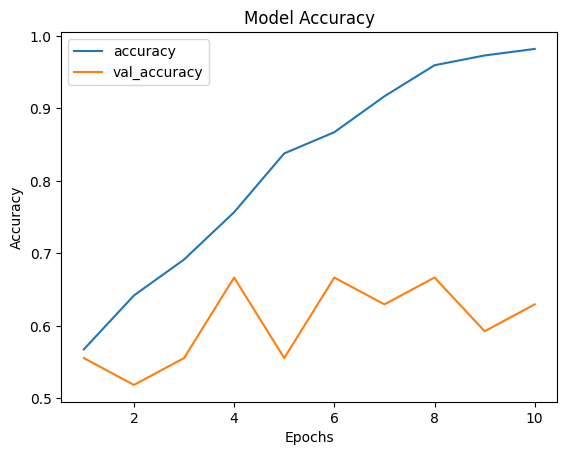

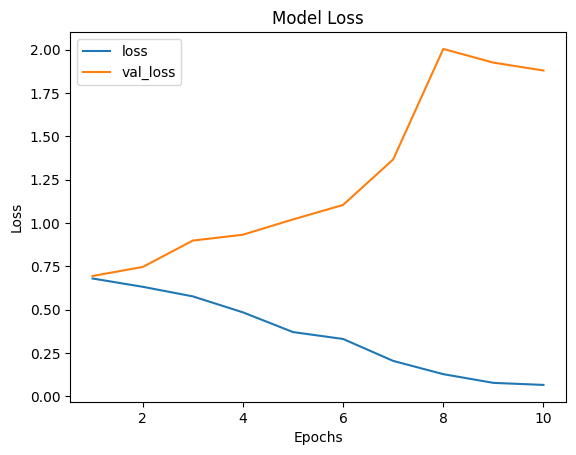

In [ ]:
import pandas as pd

# Convert training history to a pandas DataFrame
history_df = pd.DataFrame(history.history)

# Add the epoch index for reference
history_df.index += 1  # Epochs start from 1 instead of 0

# Display the DataFrame
print("Training History:")
print(history_df)

# Plot the training history
history_df[['accuracy', 'val_accuracy']].plot(title="Model Accuracy", xlabel="Epochs", ylabel="Accuracy")
history_df[['loss', 'val_loss']].plot(title="Model Loss", xlabel="Epochs", ylabel="Loss")

In [ ]:
from google.colab import files

files.download(checkpoint_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>